# SVM (Support Vector Machine)

### SVM을 활용한 BMI(비만도) 측정 예측
- BMI = 몸무게(KG) / 키(m) * 키(m)
- 표준 몸무게는 BMI 18.5 ~ 25


##### 데이터를 획득하기 위해 무작위로 2만명 데이터를 생성
- 키(cm), 몸무게(kg), Label(저체중(thin), 정상체중(normal), 비만(fat))의 csv 생성

In [2]:
import random

In [3]:
def get_bmi_label(h, w):
    bmi = w / (h / 100) ** 2
    if bmi < 18.5:
        return 'thin'
    if bmi < 25:
        return 'normal'
    return 'fat'

In [24]:
# 저장 파일 준비하기
fp = open('data/bmi.csv', 'w', encoding='utf-8')
fp.write('height,weight,label\n')

count = {'thin': 0, 'normal': 0, 'fat': 0}

for i in range(20000):
    h = random.randint(120, 200)
    w = random.randint(35, 80)
    label = get_bmi_label(h, w)
    count[label] += 1
    fp.write(f'{h},{w},{label}\n')
fp.close()
print(count)

{'thin': 6455, 'normal': 5883, 'fat': 7662}


# BMI공식 없이 BMI 예측

In [25]:
import pandas as pd

In [26]:
# 데이터 불러오기
tbl = pd.read_csv('data/bmi.csv')
print(tbl.head())

   height  weight label
0     133      47   fat
1     143      52   fat
2     126      42   fat
3     143      36  thin
4     144      70   fat


In [27]:
tbl.describe()

,height,weight
count,20000.000000,20000.000000
mean,159.993350,57.461000
std,23.436625,13.302181
min,120.000000,35.000000
25%,140.000000,46.000000
50%,160.000000,57.000000
75%,180.000000,69.000000
max,200.000000,80.000000


#### 데이터 min max 차이가 크고 std가 너무 높으면 정규화해야 한다 > 여기서는 해도 되고 안 해도 됨

In [30]:
# 컬럼을 분리하여 정규화 하기
label = tbl.label
h = tbl['height'] / 200
w = tbl['weight'] / 80

In [36]:
# data 다시 합치기
data = pd.DataFrame({ 'h': h, 'w': w})

In [37]:
# 학습용 데이터와 훈련용 데이터 나누기
from sklearn.model_selection import train_test_split
# 학습용 데이터와 훈련용 데이터 나누기
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.2)

In [38]:
# SVM import 하기
from sklearn.svm import SVC
# SVM 학습시키기
model = SVC()
model.fit(train_data, train_label)

# 테스트용 데이터에 대한 예측값 저장하기
pred = model.predict(test_data)

# 예측값과 테스트용 라벨을 비교하여 정확도 계산하기
from sklearn.metrics import accuracy_score
print('정확도:', accuracy_score(test_label, pred))


정확도: 0.99625


In [39]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_label, pred))


[[1508    3    0]
 [   0 1200    5]
 [   0    7 1277]]


In [47]:
# test_label to list
test_label_list = test_label.tolist()

# 틀린 값 확인하기
for i in range(len(test_label)):
    if test_label_list[i] != pred[i]:
        print('expect', test_label_list[i],'pred', pred[i])
        print(test_data.iloc[i])
        print()

expect normal pred thin
h    0.90
w    0.75
Name: 8886, dtype: float64

expect thin pred normal
h    0.99
w    0.90
Name: 2644, dtype: float64

expect fat pred normal
h    0.60
w    0.45
Name: 19179, dtype: float64

expect normal pred thin
h    0.735
w    0.500
Name: 1241, dtype: float64

expect normal pred thin
h    0.915
w    0.775
Name: 5841, dtype: float64

expect thin pred normal
h    1.0000
w    0.9125
Name: 12238, dtype: float64

expect thin pred normal
h    0.99
w    0.90
Name: 14285, dtype: float64

expect fat pred normal
h    0.8050
w    0.8125
Name: 11277, dtype: float64

expect thin pred normal
h    1.0000
w    0.9125
Name: 12905, dtype: float64

expect thin pred normal
h    1.0000
w    0.9125
Name: 3917, dtype: float64

expect thin pred normal
h    0.9950
w    0.9125
Name: 6442, dtype: float64

expect thin pred normal
h    0.9800
w    0.8875
Name: 12935, dtype: float64

expect normal pred thin
h    0.735
w    0.500
Name: 4048, dtype: float64

expect normal pred thin
h    0

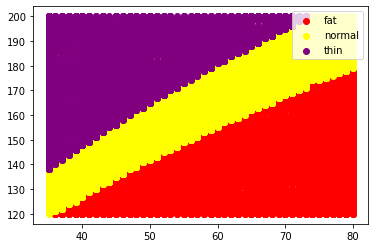

In [55]:
import matplotlib.pyplot as plt
tbl = pd.read_csv('data/bmi.csv', index_col=2)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def scatter(lbl, color):
  b = tbl.loc[lbl]
  ax.scatter(b['weight'], b['height'], c=color, label = lbl)

scatter('fat', 'red')
scatter('normal', 'yellow')
scatter('thin', 'purple')

ax.legend()
plt.show()


---
# SVM의 종류
- SVC(Classification)
- NuSVC: 위와 사실 동일   
- LinearSVC: SVM 중에서 가장 빠름. SVC대비 약 3배

In [57]:
# linearSVC로 예측하기
from sklearn.svm import LinearSVC
model2 = LinearSVC()
model2.fit(train_data, train_label)
pred2 = model2.predict(test_data)
print('정확도:', accuracy_score(test_label, pred2))
print(confusion_matrix(test_label, pred2))

정확도: 0.91725
[[1511    0    0]
 [ 176  875  154]
 [   0    1 1283]]
